# Task 0


## Exercise 4 Completed by Shivi Shrivastav


# D. DASK DATAFRAMES IN CODE – NYC AREA FLIGHTS DATA (19 points)


## Task 1. 


In [136]:
import os
import dask
from dask.distributed import Client
import dask.dataframe as dd
import pandas as pd
import glob

## Task 2.

In [8]:
filename = os.path.join('nycflights','*.csv')
filename                

'nycflights/*.csv'

In [134]:
ddf = dd.read_csv(filename)

In [135]:
pdf = pd.concat(map(pd.read_csv, glob.glob(filename)))

## Task 3. 

In [12]:
ddf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=10,,,,,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,float64,float64,int64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [13]:
ddf.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


## Task 4. 

In [14]:
%timeit ddf = dd.read_csv(filename)

3.12 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [20]:
%timeit pdf = pd.concat(map(pd.read_csv, glob.glob('nycflights/*.csv')))

2.91 s ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Task 5. 

In [22]:
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [23]:
ddf.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

## Task 6. 

In [25]:
ddf = dd.read_csv(filename,
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'CRSElapsedTime': 'float64',
                       'TailNum': 'object'})

In [26]:
len(ddf)

2611892

In [27]:
ddf.tail()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999-12-27,1,1645.0,1645,1830.0,1901,UA,1753,N516UA,225.0,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,0,0
269177,1999-12-28,2,1726.0,1645,1928.0,1901,UA,1753,N504UA,242.0,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,0,0
269178,1999-12-29,3,1646.0,1645,1846.0,1901,UA,1753,N592UA,240.0,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,0,0
269179,1999-12-30,4,1651.0,1645,1908.0,1901,UA,1753,N575UA,257.0,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,0,0
269180,1999-12-31,5,1642.0,1645,1851.0,1901,UA,1753,N539UA,249.0,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,0,0


In [28]:
ddf[['CRSElapsedTime', 'TailNum']].sample(frac=0.001).compute()

,CRSElapsedTime,TailNum
98127,350.0,NaN
57000,170.0,NaN
53519,366.0,NaN
13606,170.0,NaN
234620,176.0,NaN
...,...,...
266641,97.0,UNKNOW
38753,63.0,N524DA
153951,108.0,N340US
155838,319.0,N39343


## Task 7. 


In [29]:
ddf['TailNum'].compute()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
269176    N516UA
269177    N504UA
269178    N592UA
269179    N575UA
269180    N539UA
Name: TailNum, Length: 2611892, dtype: object

In [30]:
ddf.loc[ddf['ArrTime'] < ddf['ArrTime'].mean()].compute()

,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
88,1990-01-01,1,1205.0,1110,1343.0,1243,US,49,NaN,98.0,...,NaN,60.0,55.0,LGA,CLE,418.0,NaN,NaN,0,0
89,1990-01-02,2,1158.0,1110,1327.0,1243,US,49,NaN,89.0,...,NaN,44.0,48.0,LGA,CLE,418.0,NaN,NaN,0,0
90,1990-01-03,3,1202.0,1110,1324.0,1243,US,49,NaN,82.0,...,NaN,41.0,52.0,LGA,CLE,418.0,NaN,NaN,0,0
91,1990-01-06,6,1126.0,1110,1322.0,1243,US,49,NaN,116.0,...,NaN,39.0,16.0,LGA,CLE,418.0,NaN,NaN,0,0
92,1990-01-07,7,1114.0,1110,1236.0,1243,US,49,NaN,82.0,...,NaN,-7.0,4.0,LGA,CLE,418.0,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269146,1999-12-27,1,1102.0,1100,1305.0,1311,UA,1685,N515UA,243.0,...,208.0,-6.0,2.0,LGA,DEN,1619.0,10.0,25.0,0,0
269147,1999-12-28,2,1058.0,1100,1305.0,1311,UA,1685,N598UA,247.0,...,221.0,-6.0,-2.0,LGA,DEN,1619.0,6.0,20.0,0,0
269148,1999-12-29,3,1057.0,1100,1308.0,1311,UA,1685,N517UA,251.0,...,218.0,-3.0,-3.0,LGA,DEN,1619.0,5.0,28.0,0,0
269149,1999-12-30,4,1056.0,1100,1312.0,1311,UA,1685,N502UA,256.0,...,227.0,1.0,-4.0,LGA,DEN,1619.0,6.0,23.0,0,0


In [31]:
ddf.iloc[:,[1, 3,]].compute()

,DayOfWeek,CRSDepTime
0,1,1540
1,2,1540
2,3,1540
3,4,1540
4,5,1540
...,...,...
269176,1,1645
269177,2,1645
269178,3,1645
269179,4,1645


In [89]:
# ddf.iloc[[1, 3,]].compute()
# Above code Causes error

## Task 8. 

In [32]:
ddf_partitions = dd.from_pandas(pdf, npartitions = 10)
ddf_partitions.partitions[1]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,
26119,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,float64,float64,float64,int64,int64
52238,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Task 9. 

### 9a Calculate the number of non-missing values in each column (1 point)

In [117]:
nonmissing=ddf.notnull()
nonmissing=nonmissing.sum()
nonmissing.compute()

[########################################] | 100% Completed |  3.8s


Date                 2611892
DayOfWeek            2611892
DepTime              2540961
CRSDepTime           2611892
ArrTime              2533682
CRSArrTime           2611892
UniqueCarrier        2611892
FlightNum            2611892
TailNum              1298886
ActualElapsedTime    2533682
CRSElapsedTime       2609927
AirTime              1255069
ArrDelay             2533682
DepDelay             2540961
Origin               2611892
Dest                 2611892
Distance             2610397
TaxiIn               1298886
TaxiOut              1298886
Cancelled            2611892
Diverted             2611892
dtype: int64

### 9b Calculate the counts of each of the categorical values in the Cancelled column (1 point)

In [129]:
cancelled = ddf['Cancelled']
cancelled.value_counts().compute()

[########################################] | 100% Completed |  2.6s


0    2540961
1      70931
Name: Cancelled, dtype: int64

### 9c Calculate the max value of the DepDelay column (1 point)

In [130]:
dep_delay=ddf['DepDelay']
dep_delay.max().compute()

[########################################] | 100% Completed |  2.4s


1435.0

### 9d Find and print the columns for all the rows where the flights are Cancelled (1.5 points)

In [131]:
cancelled=ddf['Cancelled']==1
ddf.loc[cancelled].compute()

[########################################] | 100% Completed |  2.5s


,Date,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
37,1990-01-08,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
55,1990-01-29,1,NaN,2050,NaN,2203,US,38,NaN,NaN,...,NaN,NaN,NaN,LGA,ORF,296.0,NaN,NaN,1,0
61,1990-01-04,4,NaN,1850,NaN,1948,US,42,NaN,NaN,...,NaN,NaN,NaN,EWR,SYR,194.0,NaN,NaN,1,0
207,1990-01-01,1,NaN,645,NaN,850,US,93,NaN,NaN,...,NaN,NaN,NaN,LGA,IND,659.0,NaN,NaN,1,0
259,1990-01-25,4,NaN,1755,NaN,1942,US,105,NaN,NaN,...,NaN,NaN,NaN,JFK,PIT,340.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268926,1999-12-20,1,NaN,1846,NaN,2103,UA,1609,UNKNOW,NaN,...,NaN,NaN,NaN,EWR,DEN,1605.0,0.0,0.0,1,0
269031,1999-12-16,4,NaN,615,NaN,829,UA,401,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269093,1999-12-14,2,NaN,1650,NaN,1906,UA,785,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0
269153,1999-12-17,5,NaN,1400,NaN,1613,UA,1691,UNKNOW,NaN,...,NaN,NaN,NaN,LGA,DEN,1619.0,0.0,0.0,1,0


### 9e How many observations are there where the DayOfWeek column equals 1? (1 point)

In [121]:
len(ddf.loc[ddf['DayOfWeek']==1].compute())

[########################################] | 100% Completed |  2.5s


388011

### 9f How many non-cancelled flights were taken from each Origin airport? (1.5 points)


In [122]:
ddf[ddf['Cancelled'] == 0].groupby('Origin')['FlightNum'].count().compute()

[########################################] | 100% Completed |  2.8s


Origin
EWR    1139451
JFK     427243
LGA     974267
Name: FlightNum, dtype: int64

### 9fi. BONUS: Compute the ratio of non-cancelled to total flights (for that origin) for each Origin. Need to compute numerator (Series of 3 values) and denominator (Series of 3 values) separately and then divide the two Series.

In [123]:
non_cancelled= ddf[ddf['Cancelled'] == 0].groupby('Origin')['Cancelled'].count().compute()
total=ddf['Origin'].value_counts().compute()
non_cancelled/total


[########################################] | 100% Completed |  2.7s
[########################################] | 100% Completed |  2.2s


EWR    0.970463
JFK    0.983658
LGA    0.970946
dtype: float64

### 9g Calculate the average departure delay for each Origin airport by DayOfWeek (1.5 points)

In [124]:

ddf.groupby(['Origin', 'DayOfWeek']).agg({'DepDelay': 'mean'})['DepDelay'].compute()


[########################################] | 100% Completed |  2.3s


Origin  DayOfWeek
EWR     1             9.115922
        2             9.179402
        3            10.606154
        4            12.069740
        5            13.154202
        6             8.053139
        7             9.432185
JFK     1             8.884113
        2             8.841036
        3             9.448858
        4            10.846967
        5            12.339922
        6            11.191893
        7            10.947545
LGA     1             6.580465
        2             6.659778
        3             7.311600
        4             8.620151
        5             9.151866
        6             5.800159
        7             7.589457
Name: DepDelay, dtype: float64

### 9h For each of the three NYC area airports as the Destination, compute the means of all columns. You may use the .isin() method of Series (answer will have 3 rows) (1.5 points)

In [128]:
nyc_dest=ddf[ddf['Dest'].isin(['JFK','EWR','LGA'])]
nyc_dest.groupby('Dest').mean().compute()

[                                        ] | 0% Completed |  0.1s

/Users/shivs/opt/anaconda3/envs/daskpy/lib/python3.9/site-packages/dask/utils.py:1018: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return getattr(__obj, self.method)(*args, **kwargs)


[########################################] | 100% Completed |  2.5s


,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
Dest,,,,,,,,,,,,,,,,
EWR,3.838710,1216.100000,885.483871,1068.833333,845.612903,559.225806,45.166667,32.233333,27.777778,34.583333,23.766667,19.064516,7.111111,23.666667,0.032258,0.193548
LGA,4.625000,1313.500000,795.000000,1164.833333,821.375000,2310.500000,37.500000,31.125000,8.800000,25.500000,37.000000,14.750000,7.200000,18.400000,0.000000,0.250000
JFK,5.166667,1652.166667,1679.833333,1765.000000,1731.666667,1009.666667,59.500000,30.166667,19.500000,114.166667,84.833333,17.666667,7.000000,18.500000,0.000000,0.000000


### 9i For each year, compute the maximum values of ActualElapsedTime and Distance. (2 points)


In [127]:
# flights['year'] = flights['Date'].dt.year

# group the data by year and compute the maximum values of ActualElapsedTime and Distance
each_year=ddf.groupby(ddf['Date'].dt.year)
each_year.agg({'ActualElapsedTime':'max', 'Distance':'max'}).compute()


[########################################] | 100% Completed |  2.6s


,ActualElapsedTime,Distance
Date,,
1990,595.0,2586.0
1991,632.0,2586.0
1992,703.0,2586.0
1993,675.0,2586.0
1994,647.0,2586.0
1995,581.0,2586.0
1996,620.0,2586.0
1997,587.0,2586.0
1998,743.0,4962.0


## Task 10. 

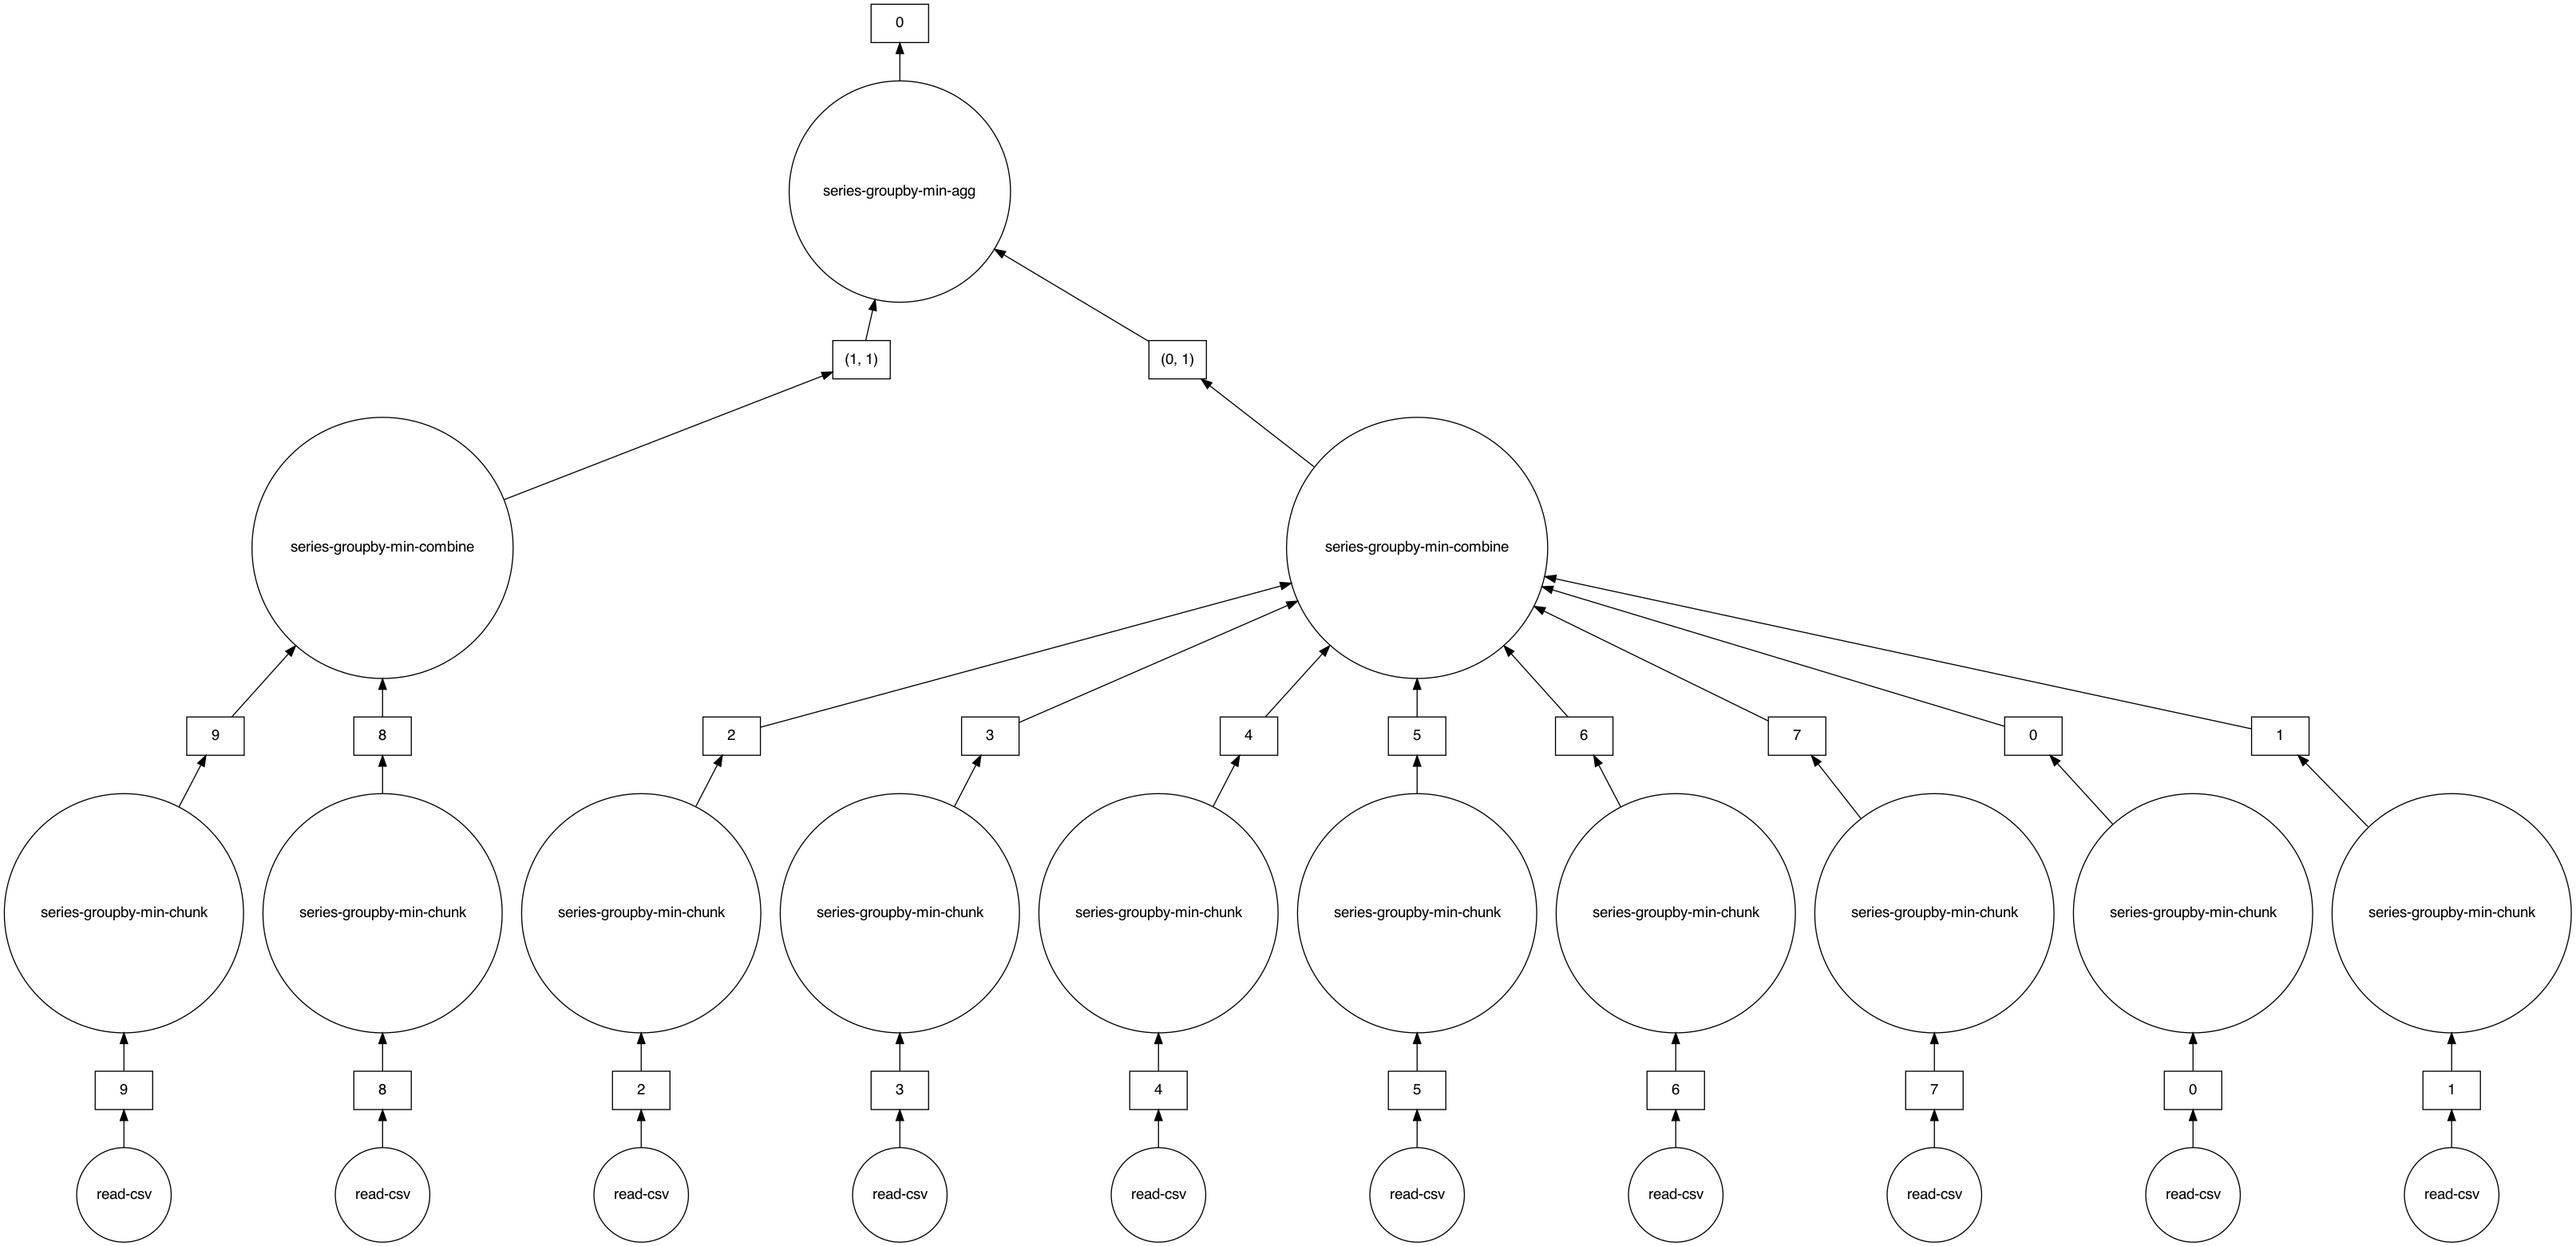

In [179]:
ddf.groupby("Dest")["ArrDelay"].min().visualize()

## Task 11. 

In [180]:
from dask.distributed import Client

client = Client(n_workers = 4, threads_per_worker=2, memory_limit ='1GB')
print(client)
client.cluster

<Client: 'tcp://127.0.0.1:51986' processes=4 threads=8, memory=3.73 GiB>


In [181]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

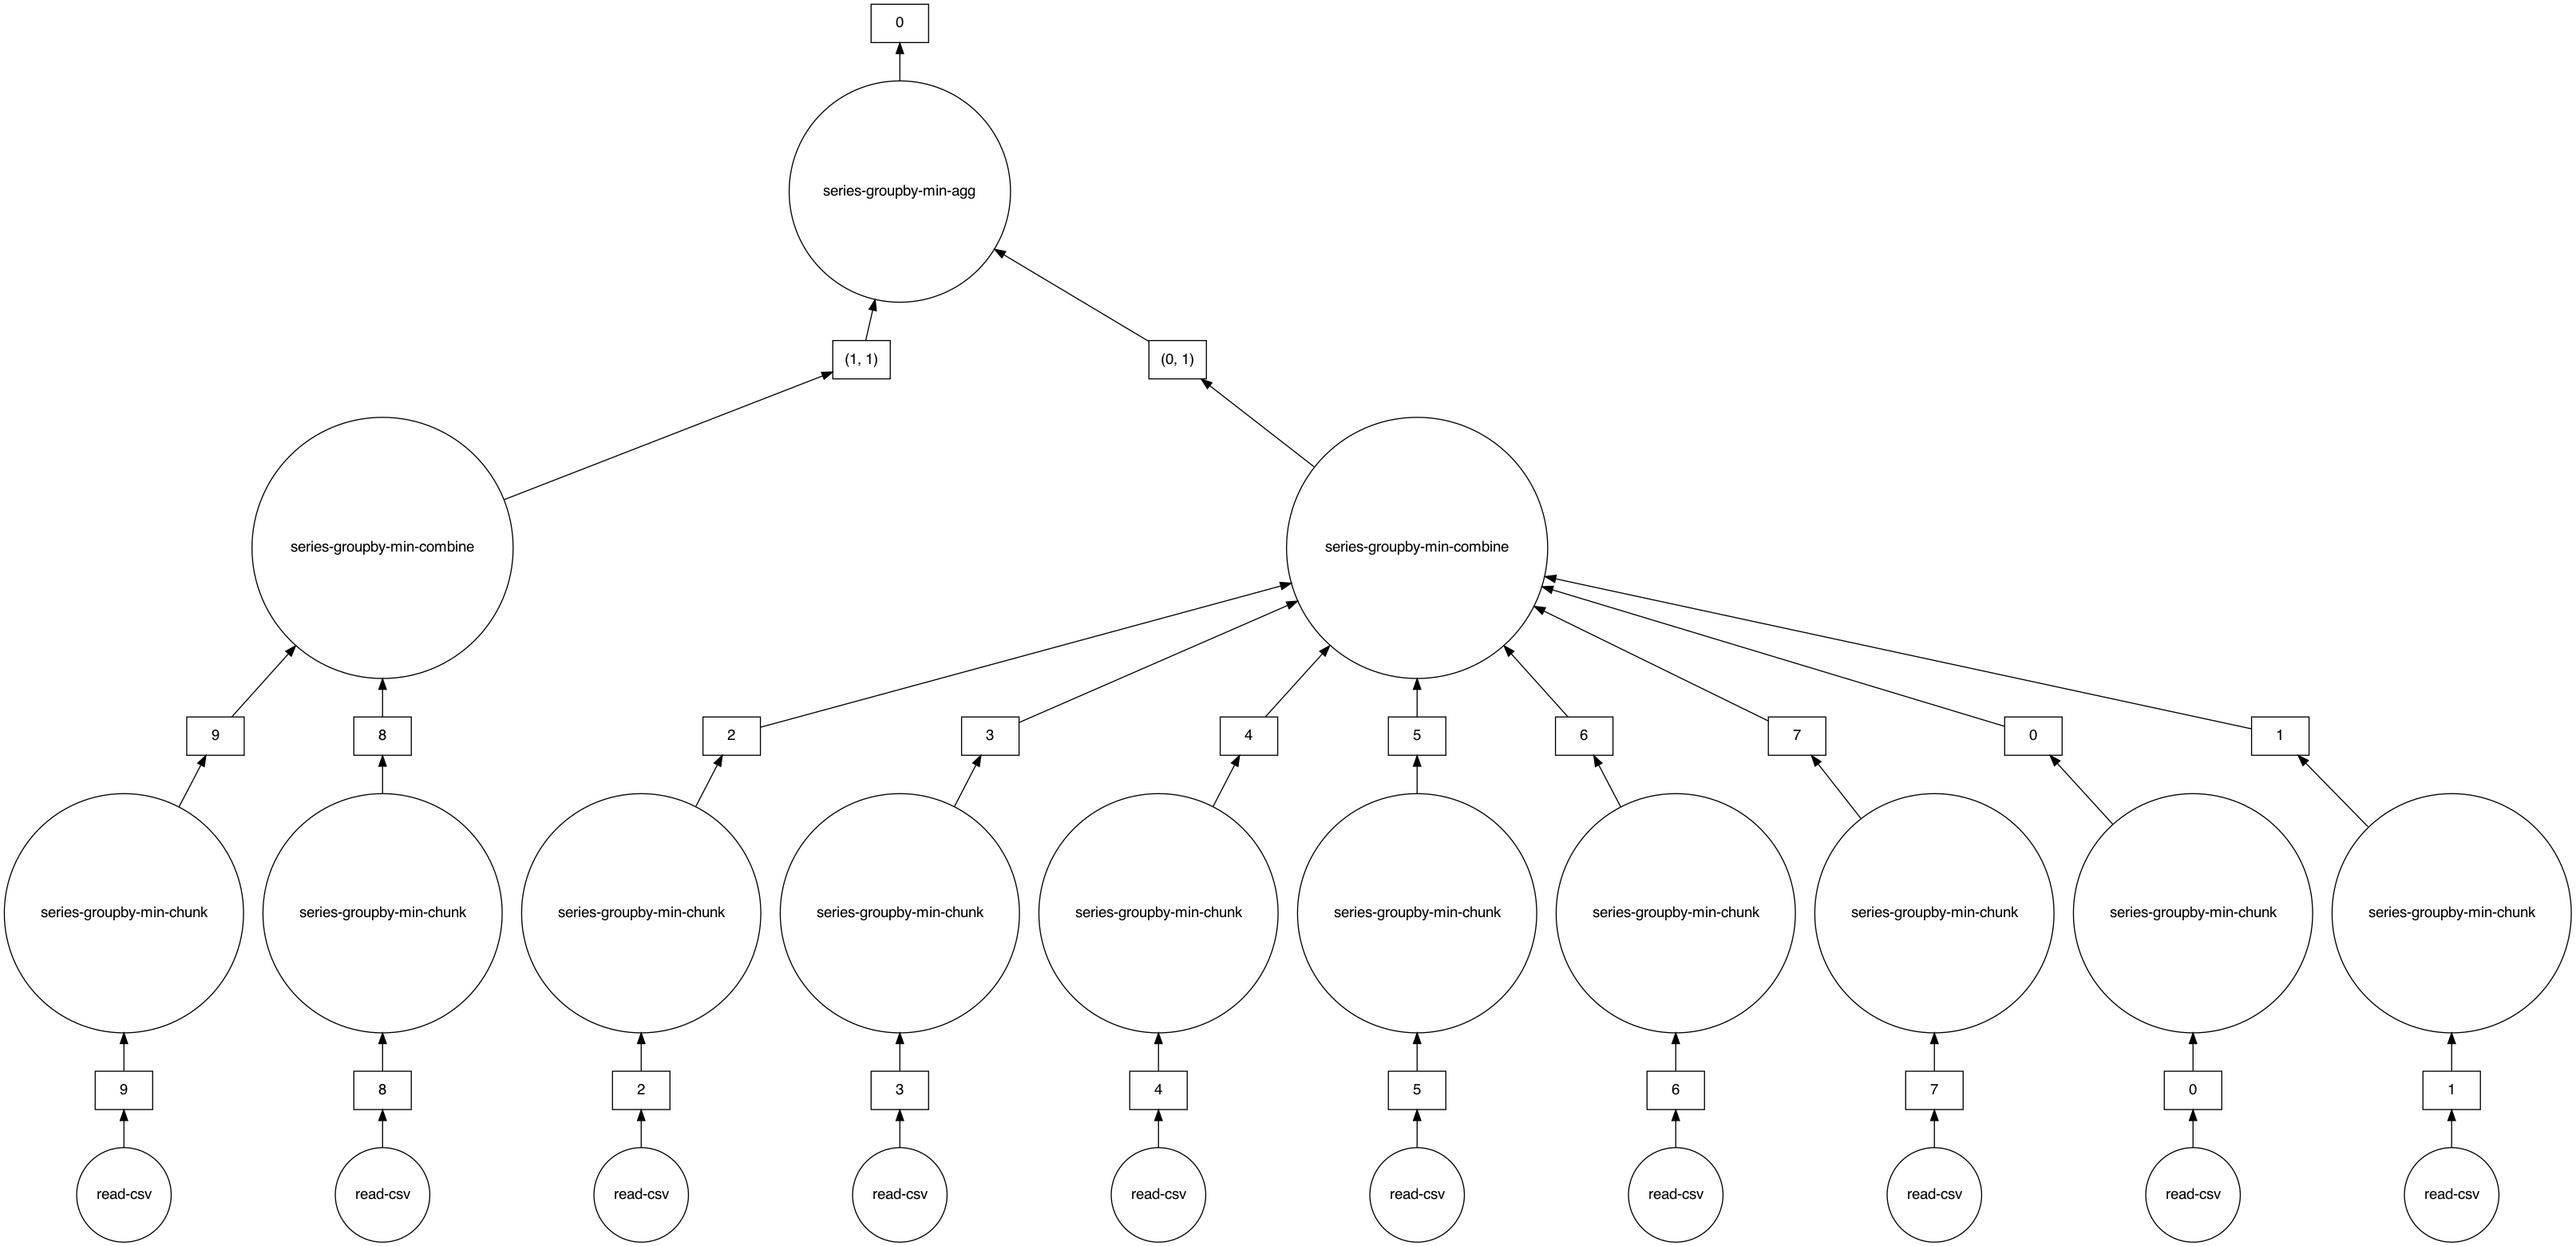

In [182]:
ddf.groupby("Dest")["ArrDelay"].min().visualize()

## Task 12. 

In [183]:
x = ddf.groupby("Dest")["ArrDelay"].min()
x.compute(schedular='threads')

distributed.worker - WARNING - Compute Failed
Function:  execute_task
args:      ((subgraph_callable-78da1741-5c0c-48f9-a6fc-ab14d5456766, [(<function read_block_from_file at 0x7f7cc8e27b80>, <OpenFile '/Users/shivs/Downloads/nycflights/1997.csv'>, 0, 24952545, b'\n'), None, True, True]))
kwargs:    {}
Exception: 'ValueError(\'Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.\\n\\n+----------------+---------+----------+\\n| Column         | Found   | Expected |\\n+----------------+---------+----------+\\n| CRSElapsedTime | float64 | int64    |\\n| TailNum        | object  | float64  |\\n+----------------+---------+----------+\\n\\nThe following columns also raised exceptions on conversion:\\n\\n- TailNum\\n  ValueError("could not convert string to float: \\\'N39340\\\'")\\n\\nUsually this is due to dask\\\'s dtype inference failing, and\\n*may* be fixed by specifying dtypes manually by adding:\\n\\ndtype={\\\'CRSElapsedTime\\\': \\\'float64\\\',\\n       \\\'TailNum\\\': \\\'ob

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N39340'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [ ]:
with dask.config.set(schedular='processes'):
    print(x.compute())

distributed.worker - WARNING - Compute Failed
Function:  execute_task
args:      ((subgraph_callable-78da1741-5c0c-48f9-a6fc-ab14d5456766, [(<function read_block_from_file at 0x7f7cc8e27b80>, <OpenFile '/Users/shivs/Downloads/nycflights/1998.csv'>, 0, 24903801, b'\n'), None, True, True]))
kwargs:    {}
Exception: 'ValueError(\'Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.\\n\\n+----------------+---------+----------+\\n| Column         | Found   | Expected |\\n+----------------+---------+----------+\\n| CRSElapsedTime | float64 | int64    |\\n| TailNum        | object  | float64  |\\n+----------------+---------+----------+\\n\\nThe following columns also raised exceptions on conversion:\\n\\n- TailNum\\n  ValueError("could not convert string to float: \\\'N14336\\\'")\\n\\nUsually this is due to dask\\\'s dtype inference failing, and\\n*may* be fixed by specifying dtypes manually by adding:\\n\\ndtype={\\\'CRSElapsedTime\\\': \\\'float64\\\',\\n       \\\'TailNum\\\': \\\'ob

# E.  MACHINE LEARNING WITH DASK (6 points)

## Task 1. 

In [184]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=4, random_state=0)

In [185]:
X[:8]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-1.90879217, -1.1602627 , -0.27364545, -0.82766028],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 1.68616989,  1.6329131 , -1.42072654,  1.04050557],
       [-0.93912893, -1.02270838,  1.10093827, -0.63714432]])

In [186]:
y[:8]

array([0, 0, 1, 0, 0, 0, 0, 1])

## Task 2. 

In [187]:
from sklearn.svm import SVC

In [188]:
estimator = SVC (random_state=42)
estimator.fit(X,y)

SVC(random_state=42)

In [189]:
estimator.support_vectors_[:5]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [ 0.79010037,  0.68530624, -0.44740487,  0.44692959],
       [ 0.06135861, -0.32391974,  0.99651845, -0.15720499]])

In [190]:
estimator.score(X,y)

0.905

## Task 3. 


In [191]:
estimator = SVC(C= 0.00001, shrinking=False, random_state=0)
estimator.fit(X,y)
estimator.support_vectors_[:4]

array([[-0.77244139,  0.3607576 , -2.38110133,  0.08757   ],
       [ 1.14946035,  0.62254594,  0.37302939,  0.45965795],
       [-0.77694695,  0.31434299, -2.26231851,  0.06339125],
       [-1.17047054,  0.02212382, -2.17376797, -0.13421976]])

In [192]:
estimator.score(X,y)

0.5007

## Task 4. 


In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
estimator = SVC(gamma='auto', probability=True, random_state=42)

param_grid = {
    'C':[0.001, 10.0],
    'kernel':['rbf','poly','linear'],
}

In [195]:
grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)

In [196]:
%time grid_search.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ................................C=0.001, kernel=rbf; total time=  10.0s
[CV] END ................................C=0.001, kernel=rbf; total time=  10.0s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   3.9s
[CV] END .............................C=0.001, kernel=linear; total time=   2.7s
[CV] END .............................C=0.001, kernel=linear; total time=   2.7s
[CV] END .................................C=10.0, kernel=rbf; total time=   2.6s
[CV] END .................................C=10.0, kernel=rbf; total time=   2.5s
[CV] END ................................C=10.0, kernel=poly; total time=   2.8s
[CV] END ................................C=10.0, kernel=poly; total time=   2.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   3.5s
[CV] END ..............................C=10.0, ke

GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

## Task 5. 


In [197]:
import os

n_cpu = os.cpu_count()
print("Number of CPUsin the system:", n_cpu)

Number of CPUsin the system: 8


In [198]:
grid_search_MC = GridSearchCV(estimator,
                              param_grid,
                              verbose=2,
                              cv=2,
                              n_jobs=-1)

In [199]:
%time grid_search_MC.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
CPU times: user 8.9 s, sys: 441 ms, total: 9.34 s
Wall time: 22.9 s


GridSearchCV(cv=2,
             estimator=SVC(gamma='auto', probability=True, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 10.0],
                         'kernel': ['rbf', 'poly', 'linear']},
             verbose=2)

In [209]:
grid_search_MC.best_params_, grid_search_MC.best_score_

({'C': 10.0, 'kernel': 'rbf'}, 0.9086000000000001)

## Task 6. 

In [210]:
import joblib

In [202]:
param_grid = {
    'C':[0.001, 0.1, 1.0, 2.5, 5., 10.0, 100., 500., 1000.,],
    # Uncomment this to perform larger Grid searches on a cluster
    # 'kernel':['rbf', 'poly', 'linear'],
    # 'shrinking':[True, False],
}

In [203]:
grid_search_Dist = GridSearchCV(estimator,
                               param_grid,
                               verbose=2,
                               cv=5,
                               n_jobs=-1)

In [204]:
%%time

with joblib.parallel_backend("dask"):
    grid_search_Dist.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 17.6 s, sys: 1.18 s, total: 18.8 s
Wall time: 1min 30s


In [205]:
pd.DataFrame(grid_search_Dist.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,30.003081,0.444489,2.355113,0.148496,0.001,{'C': 0.001},0.8495,0.8210,0.8350,0.8245,0.8320,0.8324,0.009917,9
1,10.685720,0.287837,0.790881,0.122929,0.1,{'C': 0.1},0.9025,0.8850,0.8815,0.8825,0.8865,0.8876,0.007658,8
2,8.398311,0.151678,0.597870,0.034617,1.0,{'C': 1.0},0.9185,0.9065,0.8935,0.8975,0.9110,0.9054,0.009035,7
3,8.119004,0.271822,0.568165,0.027654,2.5,{'C': 2.5},0.9200,0.9120,0.8960,0.9005,0.9155,0.9088,0.009092,6
4,7.914858,0.179770,0.587817,0.019354,5.0,{'C': 5.0},0.9190,0.9155,0.8995,0.9055,0.9180,0.9115,0.007675,5


In [206]:
grid_search_Dist.best_params_, grid_search_Dist.best_score_

({'C': 500.0}, 0.914)

In [211]:
y_pred = grid_search_Dist.predict(X)

[CV] END ...............................C=0.001, kernel=poly; total time=   5.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   6.2s
[CV] END .................................C=10.0, kernel=rbf; total time=   3.9s
[CV] END ................................C=10.0, kernel=poly; total time=   3.9s
[CV] END .............................C=0.001, kernel=linear; total time=   4.3s
[CV] END ................................C=10.0, kernel=poly; total time=   3.8s
[CV] END .............................C=0.001, kernel=linear; total time=   4.4s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.3s
[CV] END .................................C=10.0, kernel=rbf; total time=   4.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.7s
[CV] END ................................C=0.001, kernel=rbf; total time=  12.5s
[CV] END ................................C=0.001, kernel=rbf; total time=  13.1s


In [208]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4993
           1       0.88      0.96      0.92      5007

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



## Task 7. 

In [87]:
client.shutdown()

[CV] END ..............................................C=0.1; total time=  11.8s
[CV] END ..............................................C=0.1; total time=  12.3s
[CV] END ..............................................C=2.5; total time=   8.8s
[CV] END ..............................................C=5.0; total time=   9.0s
[CV] END ..............................................C=5.0; total time=   8.4s
[CV] END ............................................C=0.001; total time=  33.7s
[CV] END ..............................................C=1.0; total time=   9.9s
[CV] END ..............................................C=5.0; total time=   8.8s
[CV] END ............................................C=500.0; total time=  12.7s
[CV] END ............................................C=500.0; total time=  12.9s
[CV] END ............................................C=500.0; total time=  12.7s
[CV] END ..............................................C=1.0; total time=   9.2s
[CV] END ...................

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


[CV] END ................................C=0.001, kernel=rbf; total time=  12.8s
[CV] END ...............................C=0.001, kernel=poly; total time=   5.7s
[CV] END .................................C=10.0, kernel=rbf; total time=   3.8s
[CV] END ................................C=10.0, kernel=poly; total time=   3.9s
[CV] END ...............................C=0.001, kernel=poly; total time=   5.8s
[CV] END .............................C=0.001, kernel=linear; total time=   4.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   4.8s
[CV] END .................................C=10.0, kernel=rbf; total time=   4.0s
[CV] END ................................C=10.0, kernel=poly; total time=   3.7s
[CV] END ................................C=0.001, kernel=rbf; total time=  12.8s
[CV] END .............................C=0.001, kernel=linear; total time=   4.0s
[CV] END ................................C=10.0, kernel=poly; total time=   4.0s
[CV] END ...................